TP555 - AI/ML
Lista de Exercícios #2
Regressão Linear

1. Qual técnica de regressão linear você usaria se tivesse um conjunto de treinamento com milhares de features? Explique por quais razões você utilizaria esta técnica.
R: Iterativamente através do gradiente descendente, ele ajusta os parâmetros iterativamente variação ou decaimento adaptativo, no caso de ter um conjunto com milhares de features não é necessário atualizar manualmente (trabalhoso e demorado), o passo é adaptativamente ajustado de acordo com a performance do modelo além de possuir passos diferentes para cada parâmetro do modelo e atualizá-los independentemente, e quando existe algum parâmetro a ser ajustado o esquema normalmente funciona muito bem para uma grande gama de valores, já a equação normal não é escalonável e consome muita memória.

2. Suponha que as features (i.e., atributos) do seu conjunto de treinamento tenham escalas muito diferentes. Qual técnica de regressão linear pode sofrer com isso e como? O que pode ser feito para mitigar este problema?
R: Gradiente descendente, pois se as features tiverem escalas muito diferentes, os parâmetros de features com escala muito grande vão ser atualizados mais rapidamente do que parâmetros com escala pequena. Pode-se usar o Escalonamento de Features utilizando padronização, pois ele permite que a superfície tenha uma inclinação similiar em todas as direções, ou seja, os atributos ficam com variações similares, com essa superfície o treinamento se torna rápido e o algoritmo converge mais rapidamente, trazendo assim, todos os valores (pesos ou features) para as mesmas magnitudes.

3. Suponha que você use o gradiente descendente em batelada e plote o erro de cada época. Se você perceber que o erro aumenta constantemente, o que provavelmente está acontecendo? Como você pode consertar isso?
R: Pode ter acontecido que o passo de aprendizagem utilizado para o treinamento seja maior do que deveria, com isso ele pode passar o mínimo global, fazendo com que o erro aumente constantemente a cada época. Podemos ajustar o passo de aprendizagem para que seja pequeno o suficiente para convergir corretamente.

4. Entre os algoritmos baseados no gradiente descendente (GD) que discutimos (batch, estocástico e mini-batch), qual deles chega mais rapidamente à vizinhança da solução ótima? Qual deles realmente converge? O que você pode fazer para que os outros também convirjam?
R: O Gradiente Descendente Estocástico e Mini-batch. O Batch. Para o estocástico a solução é reduzir gradualmente a taxa de aprendizagem, para que ele consiga se livrar dos mínimos globais inicialmente (com grandes valores) e depois diminuindo os valores para estabilizar no mínimo global. Para o Mini-batch pode-se usar esquemas de variação do passo de aprendizagem para melhorar a convergência.

5. Em sala de aula, nós discutimos 3 tipos de algoritmos baseados no gradiente descendente (batch, estocástico e mini-batch), porém, o código do mini-batch foi o único que não foi apresentado. Portanto, neste exercício eu peço que vocês:

a. Implementem o algoritmo do mini-batch

In [8]:
import numpy as np

# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
    return theta, error_list

b. Testem sua implementação com y = 2*x1 + 2*x2 + w, onde x1, x2 e w são M = 1000 valores retirados de uma distribuição aleatória Gaussiana normal padrão (i.e, com média 0 e variância igual a 1) e utilizando a função hipótese h = a1*x1 + a2*x2,

In [ ]:
import numpy as np

# Define the number of examples.
M = 1000

# Generate target function.
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
y = (2*x1) + (2*x2) + np.random.randn(M, 1)

# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Number of epochs.
n_epochs = 1
# Constant learning rate.
alpha = 0.1
# Random initialization of parameters.
a = np.random.randn(2,1)

# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
    return theta, error_list

c. Plotem a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 para cada iteração do mini-batch, e o gráfico de iteração versus erro,

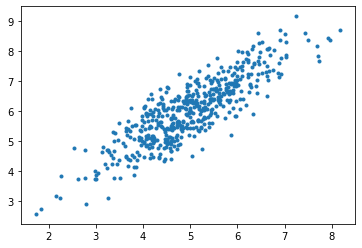

Number of examples in training set =  7200
Number of examples in testing set =  800
Bias =  [0.7776056]
Coefficients =  [[1.03904098]]


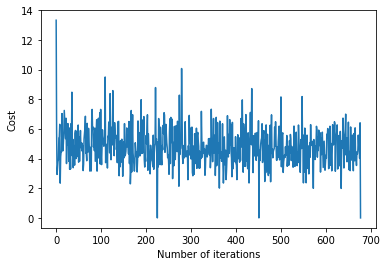

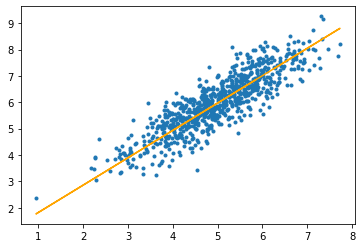

Mean absolute error =  0.43952608632782053


In [12]:
# importing dependencies 
import numpy as np 
import matplotlib.pyplot as plt 
  
# creating data 
mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 
  
# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 
  
# train-test-split 
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.90
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 
  
print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 

# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 

d. Encontrem o valor ótimo do passo de aprendizagem ( Dica: utilizem os gráficos da superfície de contorno com os parâmetros a1 e a2 para cada iteração do mini-batch e o gráfico de iteração versus erro para saber se aquele passo é o ótimo. Acessem os links abaixo para entender como vocês podem plotar os gráficos de contorno.),
■ https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
■ https://www.python-course.eu/matplotlib_contour_plot.php

In [ ]:
# importing dependencies 
import numpy as np 
import matplotlib.pyplot as plt 
  
# creating data 
mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 
  
# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 
  
# train-test-split 
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.90
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 
  
print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 

# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 


e. Comparem os resultados do mini-batch com os resultados obtidos com o GD em
batelada (batch) e GD estocástico ( Dica : para a comparação, usem os códigos
que estão nos slides da aula e plotem os gráficos da superfície de contorno com
os parâmetros a1 e a2 para cada iteração e o gráfico de iteração versus o erro
para GD em batelada e estocástico).

f. Baseando-se nos gráficos do item anterior, a que conclusões vocês podem chegar quanto ao treinamento dos 3 tipos de gradiente descendente?

6. Dada a seguinte função hipótese e assumindo o erro quadrático médio como função de erro h = a0 + a1*x + a2*x^2. Encontre as equações de atualização dos pesos/parâmetros para esta função. Em seguida, utilizando os vetores x e y definidos abaixo, encontre os parâmetros a0, a1 e a2 através do método da regressão de forma fechada e com gradiente descendente em batelada. y = 3 + 1.5*x + 2.3*x^2 + w, onde x é um vetor coluna com M = 1000 valores retirados de uma distribuição aleatória uniformemente distribuída no intervalo de -5 a 5 e w é outro vetor coluna com M valores retirados de uma distribuição aleatória Gaussiana com média 0 e variância igual a 10.

a. Plote o gráfico do número de iterações versus o erro.

b. Baseado no gráfico acima, encontre o melhor valor para o passo de aprendizagem.

7. Neste exercício você vai utilizar o arquivo training.csv onde a primeira coluna são os valores de x (feature) e a segunda de y (label). Baixe o arquivo do endereço:
training.csv . Após, leia o conteúdo do arquivo, ou seja, os vetores x e y, com os seguintes comandos:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('training.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')

Em seguida, utilize o algoritmo do gradiente descendente em batelada para encontrar os parâmetros de cada uma das seguintes funções hipóteses.

a. h = a0 + a1*x
b. h = a0 + a1*x + a2*x^2
c. h = a0 + a1*x + a2*x^2 + a3*x^3
d. h = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4

Para cada uma das funções hipótese acima faça o seguinte:
a. Encontre os valores ótimos dos parâmetros através do método de forma fechada, i.e., equação normal, ou também conhecida como método dos mínimos quadrados.
b. Encontre as equações de atualização dos parâmetros assumindo o erro quadrático médio como função de erro.
c. Encontre o valor ótimo do passo de aprendizagem.
d. Plote um gráfico que mostre x vs. y e x vs. h, ou seja, um gráfico comparando os
dados originais com a estimativa (i.e., hipótese) da função que gerou y.
e. Plote um gráfico com do número de iterações versus o erro.

Em seguida responda às seguintes perguntas:
A. Qual das funções hipótese acima aproxima melhor a função alvo (target), ou seja, qual produz o menor erro ao final do treinamento?
B. Dado que você encontrou os parâmetros que otimizam cada uma das funções hipótese acima (ou seja, você agora tem um modelo treinado que pode predizer o resultado para novos exemplos), use os dados contidos no arquivo predicting.csv e calcule o erro quadrático médio para cada um dos modelos (i.e., função hipótese). Qual função hipótese resulta no menor erro quadrático médio? O que você consegue concluir a respeito deste resultado?

8. Neste exercício você irá aplicar escalonamento de features aos dados de treinamento e teste. Dada a seguinte função objetivo
y = x1 + x2, onde x1 é um vetor coluna com M amostras retiradas de uma distribuição Gaussiana com média 0 e desvio padrão unitário e x2 é um vetor coluna com M amostras retiradas
de uma distribuição Gaussiana com média 10 e desvio padrão igual a 10. Gere dois conjuntos de dados, com M = 1000 amostras cada. Um conjunto será utilizado para
treinamento e o outro para teste, ou seja, validação do modelo treinado. Utilize o gradiente descendente em batelada com a seguinte função hipótese h = a1*x1 + a2*x2, com a1 e a2 iniciais iguais a -20 e -20, respectivamente. Para todos os casos abaixo, treine os modelos com o mesmo número máximo de iterações, por exemplo, 2000 iterações e um critério de parada que faça o algoritmo parar quando o erro entre duas épocas consecutivas for menor do que 0.001, ou seja, o algoritmo irá parar se o erro for menor do 0.001 ou se atingir o número máximo de iterações. Pede-se:
a. Sem aplicar nenhum escalonamento de features aos exemplos de treinamento, plote a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 encontrados durante as iterações (ou seja, o histórico de valores que o algoritmo encontra durante o treinamento do modelo) e o gráfico de erro quadrático médio versus o número de iterações para os conjuntos de treinamento e teste. OBS.1: Não se esqueça de encontrar o valor ótimo para o passo de aprendizagem. OBS.2: Não se esqueça de encontrar o valor ótimo dos pesos/parâmetros e
plotá-los no gráfico de contorno com o histórico dos pesos.

b. Aplique a normalização min-máx às features de treinamento e teste, plote a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 encontrados durante as iterações e o gráfico de erro quadrático médio versus o número de iterações para os conjuntos de treinamento e teste. OBS.1 : Não se esqueça de encontrar o valor ótimo para o passo de aprendizagem. OBS.2 : Não se esqueça que o conjunto de testes é normalizado com os valores mín-máx encontrados para o conjunto de treinamento. OBS.3: Não se esqueça de encontrar o valor ótimo dos pesos/parâmetros e plotá-los no gráfico de contorno com o histórico dos pesos.

c. Aplique a padronização às features de treinamento e teste, plote a superfície de erro, a superfície de contorno com os parâmetros a1 e a2 encontrados durante as iterações e o gráfico de erro quadrático médio versus o número de iterações para os conjuntos de treinamento e teste. OBS.1: Não se esqueça de encontrar o valor ótimo para o passo de aprendizagem. OBS.2 : Não se esqueça que o conjunto de testes é padronizado com os valores de padronização encontrados para o conjunto de treinamento. OBS.3: Não se esqueça de encontrar o valor ótimo dos pesos/parâmetros e plotá-los no gráfico de contorno com o histórico dos pesos.

d. Repita os itens b e c aplicando desta vez a normalização min-máx e a padronização, respectivamente, também aos targets/rótulos (ou seja, os valoresde y).

e. Baseado nos resultados anteriores o que você pode concluir a respeito do escalonamento de features? (D ica : Comente a respeito das formas das superfícies de erro, dos números de iterações necessárias para se alcançar o ponto ótimo, isso se ele é alcançado, da diferença entre o erro quadrático médio obtido para o conjunto de treinamento e o obtido para o conjunto de testes (são similares ou diferentes), da diferença entre os valores do erro quadrático médio para os 3 casos acima, i.e., sem escalonamento e com os 2 tipos de escalonamento com e sem escalonamento dos labels (qual resulta no menor erro? Escalonar os labels traz algum benefício? Como ficam as superfícies de erro quando se escalona os labels?), e o que mais você achar interessante comentar. Quanto mais detalhada sua análise dos resultados, melhor será sua
avaliação neste exercício.)